# BASICS 01 - Load events with Tonic and make Time Surfaces

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import tonic
from hots.timesurface import timesurface
from hots.utils import get_loader, get_dataset_info
import matplotlib.pyplot as plt

number of samples in the trainset: 48
number of samples in the testset: 48
----------------------------------------
number of samples in each class for the trainset: [12. 12. 12. 12.]
number of samples in each class for the testset: [12. 12. 12. 12.]
----------------------------------------
Mean value for time: 17283.270833333332
Mean value for mean_isi: 6.934187320013135
Mean value for nb_events: 2991.0208333333335


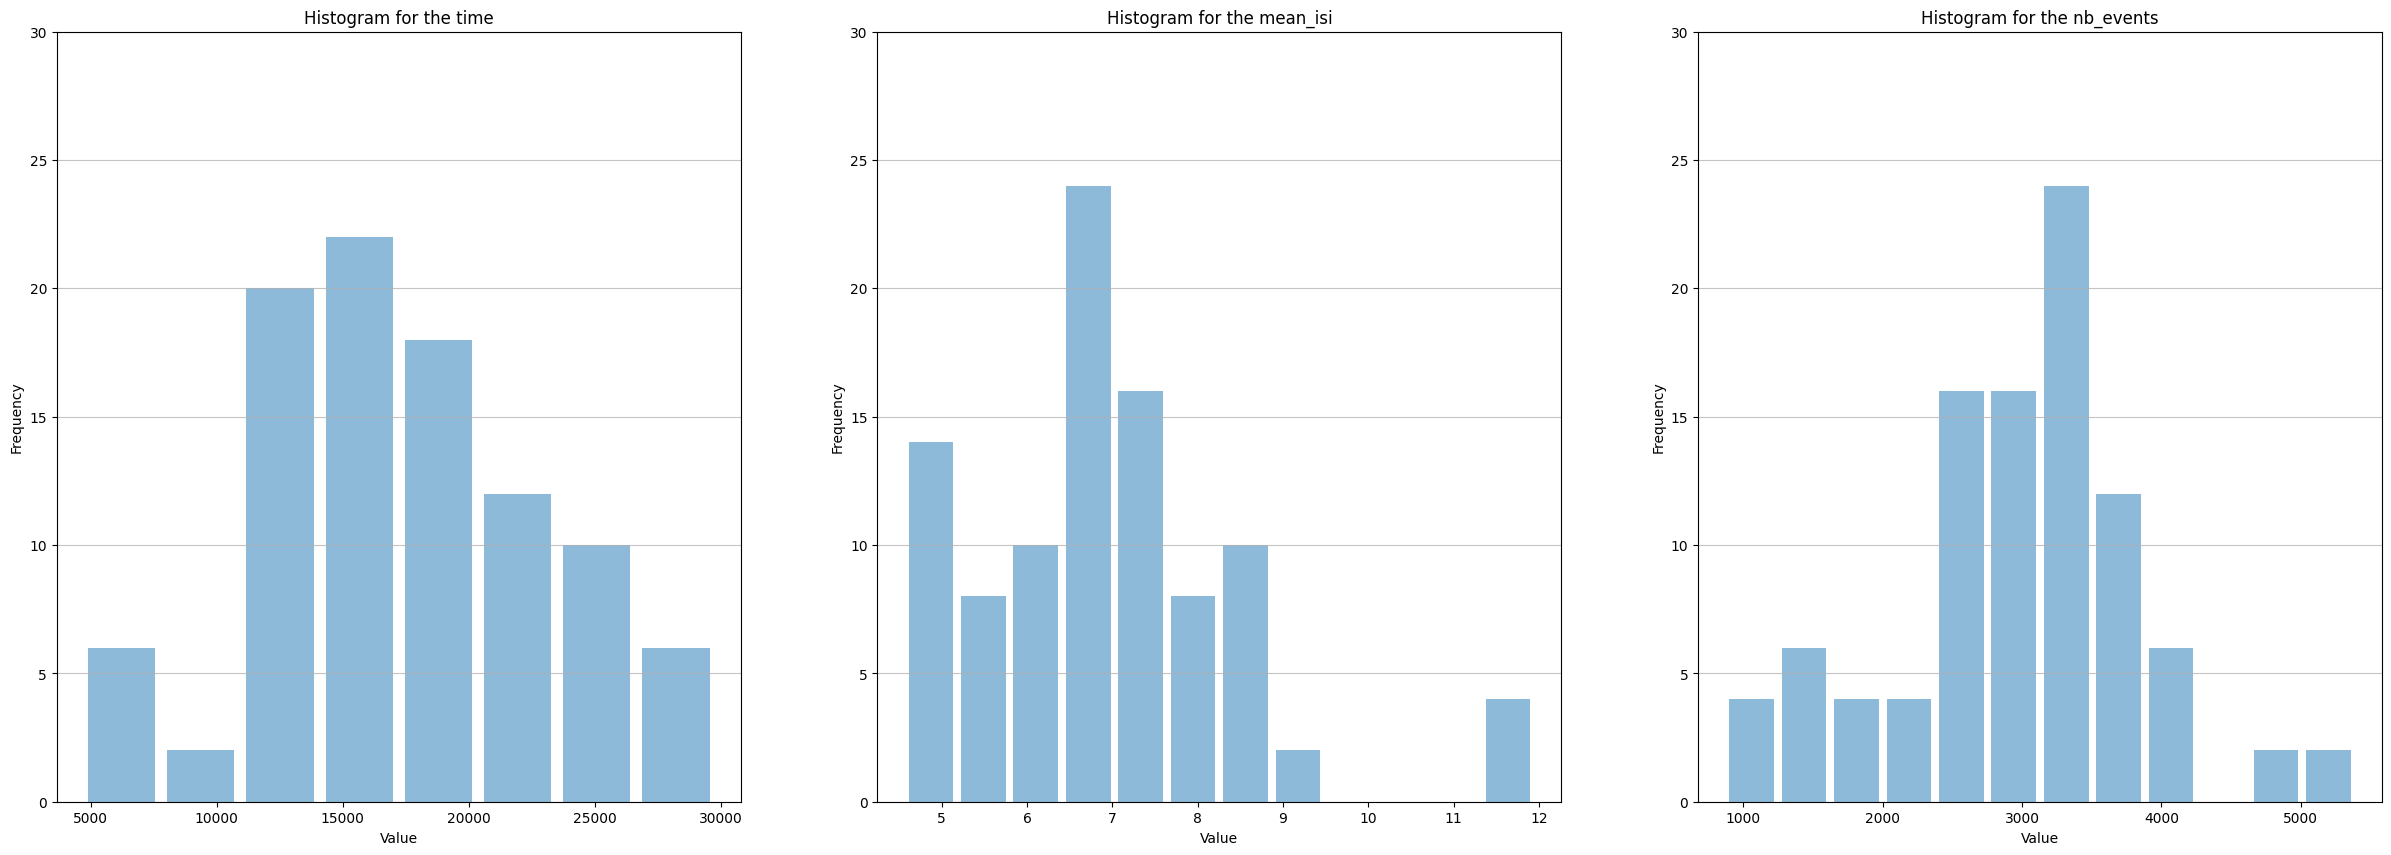

In [25]:
transform = tonic.transforms.NumpyAsType(int)
dataset = tonic.datasets.POKERDVS(save_to='../../Data/', train=True, transform=transform)
loader = get_loader(dataset)
get_dataset_info(dataset,dataset, properties = ['time', 'mean_isi', 'nb_events']);

In [26]:
events, target = next(iter(loader))

In [29]:
tau = 5e3
filtering_threshold = 10
TSs_nobatch, ind_filtered_nobatch = timesurface(events.squeeze(), dataset.sensor_size, dataset.ordering, tau = tau, filtering_threshold=filtering_threshold)#,  surface_dimensions=(9,9))

tensor([  10,   11,   12,  ..., 2231, 2232, 2233])


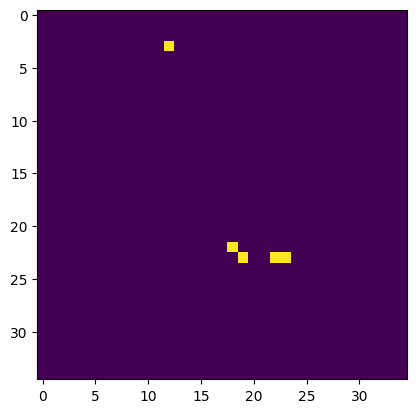

In [32]:
event_indice = 0
ts_off = plt.imshow(TSs_nobatch[event_indice][0,:,:])

In [15]:
import torch
ts_batch_size = 100
previous_timestamp = []
TSs = torch.Tensor([])
ind_outputs = torch.Tensor([])
start_indice = torch.Tensor([0])
events = events.squeeze(0)
while events.shape[0]-start_indice.item()>ts_batch_size:
    if ind_outputs.shape[0]>0:
        start_indice = ind_outputs[-1]+1
    all_ts, ind_filtered, previous_timestamp = timesurface(events, (dataset.sensor_size[0], dataset.sensor_size[1], dataset.sensor_size[2]), dataset.ordering, tau = tau, filtering_threshold = filtering_threshold, ts_batch_size = ts_batch_size, first_indice = start_indice, previous_timestamp = previous_timestamp)
    ind_outputs = torch.hstack([ind_outputs,ind_filtered+start_indice]) if ind_outputs.shape[0]>0 else ind_filtered
    TSs = torch.cat([TSs,all_ts], 0) if TSs.shape[0]>0 else all_ts

In [ ]:
print((TSs-TSs_nobatch).sum())